## Test dependence of distance overestimation on number of spatial dimensions, given localization error

We will measure the distance between two points, but each point's location includes some guassian localization error. Does the resulting set of possible distances we might measure between these points get biased as the number of spatial dimensions increases?

We expect that in 1D Gaussian localization error should cause us to over- and under-estimate the distance with equal likelihood. But as we increase the number of dimensions, we believe the number of possibilites that we overestimate should dominate. Let's test this computationally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
def create_region(radius, center, n_dim, N):
    """Get N samples of possible location measurements for 'center', given gaussian noise with some radius"""
    return [[center[dim]+radius*np.random.randn() for dim in range(0, n_dim)] for n in range(N)]

In [3]:
def calc_percent(radius, separation, n_dim, N):
    """Given two sets of N location measurements, each from a region (center point with gaussian noise), find the percent of times that
    we overestimate the distance between the centers, given one sample from each region"""
    
    # generate two sets of location measurements each with N points, set radius and number of dimensions, with centers separated by a set distance
    locs1 = create_region(radius, np.zeros(n_dim), n_dim, N)
    locs2 = create_region(radius, np.concatenate((np.array([separation]), np.zeros(n_dim-1))), n_dim, N)
    
    # find pairwise dists between all points on each disk
    dists = cdist(locs1, locs2)

    return (dists[dists>separation].size / dists.size), np.median(dists)/separation

In [ ]:
# set region radii (radius of gaussian blur to center location), number of samples we'll take from each region
radius = 1
N = 10**5
# set the values of separation distance to noise radius values to sample
ratio_list = [2, 2.25, 2.5, 2.75, 3, 4, 5, 10, 15, 20, 40, 60, 80, 100]

# repeat process in 1, 2, and 3 dimensions
results1 = [calc_percent(radius, radius*ratio, 1, N) for ratio in ratio_list]
results2 = [calc_percent(radius, radius*ratio, 2, N) for ratio in ratio_list]
results3 = [calc_percent(radius, radius*ratio, 3, N) for ratio in ratio_list]

In [10]:
# extract percent errors as a function of nondimensional spacing (separation/R) for each number of spatial dimensions (to plot in Figure 1)
percent1 = [output[0] for output in results1]
percent2 = [output[0] for output in results2]
percent3 = [output[0] for output in results3]

# extract median nondimensional distances (dist/separation) as a function of nondimensional spacing for each number of dimensions (to plot in Figure 2)
med1 = [output[1] for output in results1]
med2 = [output[1] for output in results2]
med3 = [output[1] for output in results3]

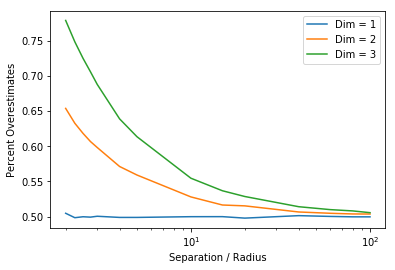

In [12]:
# plot results for each number of dimensions
plt.plot(ratio_list, percent1, label='Dim = 1')
plt.plot(ratio_list, percent2, label='Dim = 2')
plt.plot(ratio_list, percent3, label='Dim = 3')
plt.legend()
plt.xscale('log')
plt.xlabel('Separation / Radius')
plt.ylabel('Percent Overestimates');

From this analysis its clear that localization error in higher dimensional spaces can cause a large enrichment of overestimation of distance relative to one-dimensioonal space, as we anticipated. This difference becomes vanishingly small when the separation distance between the regions becomes much larger than the radius of the gaussian blur.

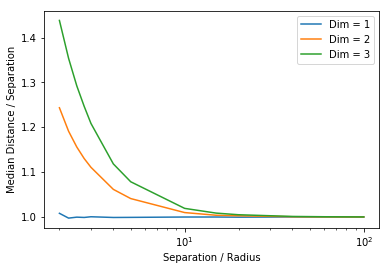

In [21]:
# plot results for each number of dimensions
plt.plot(ratio_list, med1, label='Dim = 1')
plt.plot(ratio_list, med2, label='Dim = 2')
plt.plot(ratio_list, med3, label='Dim = 3')
plt.legend()
plt.xscale('log')
plt.xlabel('Separation / Radius')
plt.ylabel('Median Distance / Separation');